Kích thước của mảng NumPy: (9, 761)


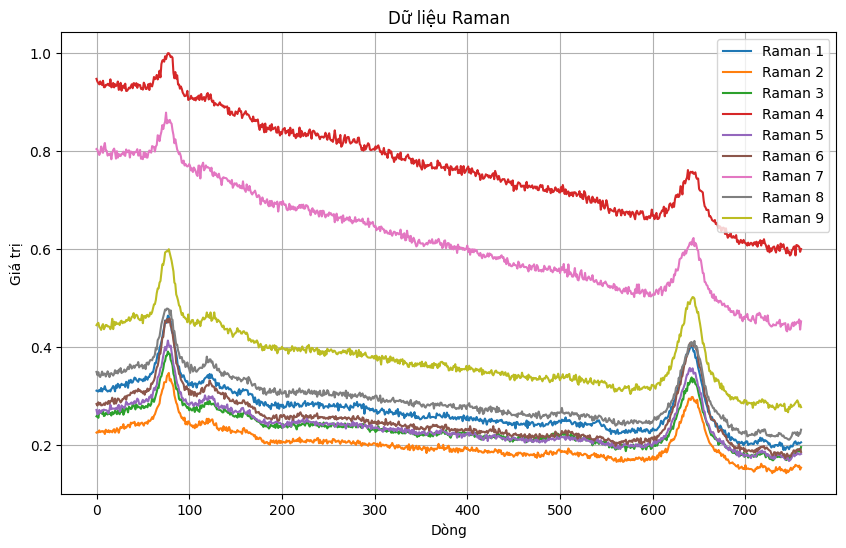

In [43]:
import numpy as np
import matplotlib.pyplot as plt

with open('./data/Ethanol_Methanol/Me-Et 9-1 Ex785 Gr600 H400 ND100 Aqc30 Acc2 mapping.txt', 'r') as file:
    lines = file.readlines()

# Tạo danh sách lưu trữ dữ liệu Raman và nồng độ tương ứng
data_raman = []

# Duyệt qua từng dòng trong danh sách
for i, line in enumerate(lines):
    if i == 0:
        continue
    # Tách dữ liệu trên mỗi dòng thành hai phần, sử dụng khoảng trắng làm dấu phân tách
    parts = line.strip().split()
    parts = np.asarray(parts)
    parts = parts.reshape((1,parts.shape[0]))
    parts = [float(x) for x in parts[0][1:]]
    parts = np.asarray(parts)
    # Phần đầu tiên là dữ liệu Raman, phần thứ hai là nồng độ
    data_raman.append(parts)

# Chuyển danh sách thành mảng NumPy
data_raman = np.array(data_raman)
data_raman = data_raman / np.max(data_raman)
# In ra kích thước của mảng

print("Kích thước của mảng NumPy:", data_raman.shape)
# Vẽ plot
plt.figure(figsize=(10, 6))
for i in range(data_raman.shape[0]):
    plt.plot(data_raman[i, :], label=f'Raman {i+1}')

plt.title('Dữ liệu Raman')
plt.xlabel('Dòng')
plt.ylabel('Giá trị')
plt.legend()
plt.grid(True)
plt.show()



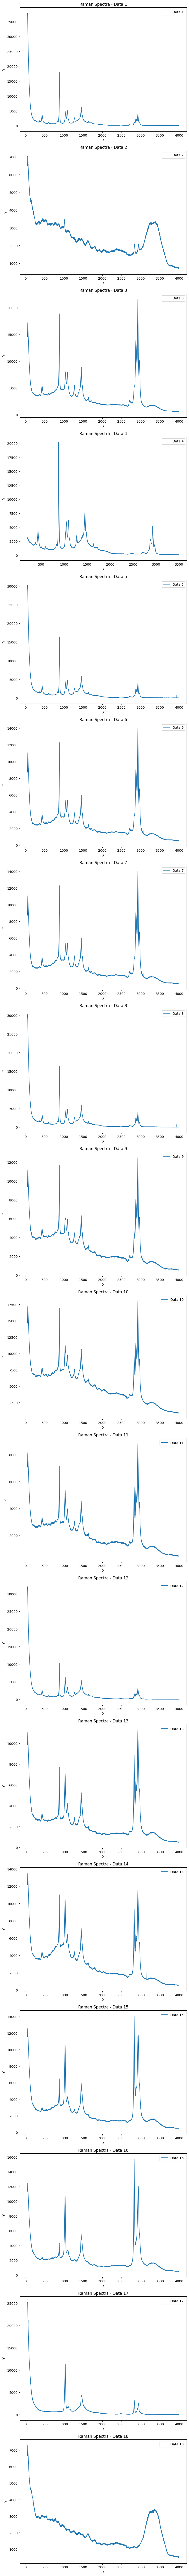

In [2]:
import os
import numpy as np

folder_path = "./data/20240313"  # Đường dẫn đến thư mục của bạn

data_list = []  # Danh sách để lưu trữ các mảng con

# Kiểm tra xem đường dẫn thư mục có tồn tại không
if os.path.exists(folder_path):
    # Lặp qua tất cả các tệp trong thư mục
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        # Kiểm tra xem tệp có phải là tệp văn bản không
        if file_path.endswith(".txt"):
            # Tạo một mảng để lưu trữ dữ liệu từ tệp
            data = []
            # Đọc dữ liệu từ tệp và thêm vào mảng con
            with open(file_path, "r") as file:
                lines = file.readlines()
                for line in lines:
                    x, y = line.strip().split("\t")
                    data.append([float(x), float(y)])
            # Thêm mảng con vào danh sách
            data = np.array(data)
            data_list.append(data)
            
else:
    print("Đường dẫn không tồn tại.")
    
import matplotlib.pyplot as plt

def plot_data(data_list):
    # Tạo một subplot cho mỗi mảng con trong data_list
    fig, axs = plt.subplots(len(data_list), figsize=(8, 6*len(data_list)))
    # Vẽ biểu đồ cho mỗi mảng con
    for i, data in enumerate(data_list):
        # Tạo các list chứa giá trị x và y từ mảng con
        x_values = [point[0] for point in data]
        y_values = [point[1] for point in data]
        # Vẽ biểu đồ
        axs[i].plot(x_values, y_values, label=f"Data {i + 1}")
        axs[i].set_xlabel('X')
        axs[i].set_ylabel('Y')
        axs[i].set_title(f'Raman Spectra - Data {i + 1}')
        axs[i].legend()

    plt.tight_layout()
    plt.show()

# Sử dụng hàm để vẽ biểu đồ từ danh sách data_list
plot_data(data_list)


In [23]:
import os
import numpy as np

folder_path = "./data/20240313"  # Đường dẫn đến thư mục của bạn

data_list = []  # Danh sách để lưu trữ các mảng con

# Kiểm tra xem đường dẫn thư mục có tồn tại không
if os.path.exists(folder_path):
    # Lặp qua tất cả các tệp trong thư mục
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        # Kiểm tra xem tệp có phải là tệp văn bản không
        if file_path.endswith(".txt"):
            # Tạo một mảng để lưu trữ dữ liệu từ tệp
            data = []
            # Đọc dữ liệu từ tệp và thêm vào mảng con
            with open(file_path, "r") as file:
                lines = file.readlines()
                for line in lines:
                    x, y = line.strip().split("\t")
                    data.append([float(x), float(y)])
            # Thêm mảng con vào danh sách
            data = np.array(data)
            data_list.append(data)
            
else:
    print("Đường dẫn không tồn tại.")
    
# Nội suy dữ liệu từ 7000 điểm thành 880 điểm
new_num_points = 880
for i, data in enumerate(data_list):
    # Lấy dữ liệu từ cột đầu (x) và cột thứ hai (y)
    x_values = data[:, 0]
    y_values = data[:, 1]

    # Nội suy dữ liệu
    x_new = np.linspace(x_values.min(), x_values.max(), new_num_points)
    y_new = np.interp(x_new, x_values, y_values)
    
    

    # Kết hợp dữ liệu nội suy lại thành một mảng 2D mới
    data_list[i] = np.column_stack((x_new, y_new))

import matplotlib.pyplot as plt

def plot_data(data_list_inter):
    # Tạo một subplot cho mỗi mảng con trong data_list
    fig, axs = plt.subplots(len(data_list_inter), figsize=(8, 6*len(data_list_inter)), dpi=300)
    # Vẽ biểu đồ cho mỗi mảng con
    for i, data in enumerate(data_list_inter):
        # Tạo các list chứa giá trị x và y từ mảng con
        x_values = data[:, 0]
        y_values = data[:, 1]
        # Vẽ biểu đồ
        axs[i].plot(x_values, y_values, label=f"Data {i + 1}")
        axs[i].set_xlabel('X')
        axs[i].set_ylabel('Y')
        axs[i].set_title(f'Raman Spectra - Data {i + 1}')
        axs[i].legend()

    plt.tight_layout()
    plt.show()

# Sử dụng hàm để vẽ biểu đồ từ danh sách data_list
data_list = np.array(data_list)
print(data_list.shape)
plot_data(data_list)


(18, 880, 2)
